# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 
> 
> **_Video Lecture_**: Since you guys will be struggling with real data today, the first lecture today is just a short, silly pep-talk to cheer you up in the midst of the tedium of working with messy wikipedia data.

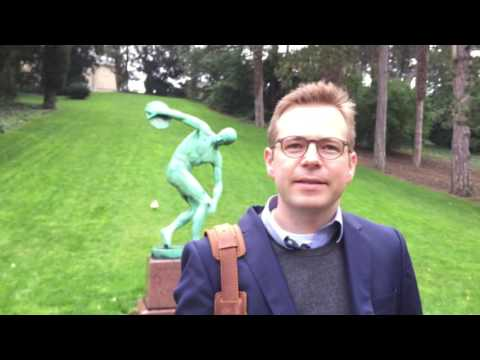

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("VlVvyWliQU8",width=800, height=450)

Enough about the process, let's get to the content. My plan for the next few lectures is to use network science and Wikipedia to learn about philosophy. We're going to download all the Wikipedia pages about philosophers from Wikipedia - and then create the network of the pages that link to each other. Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to understand the text displayed on those pages. 

But for today, the tasks are

* Learn about _regular expressions_
* Find the names of all the philosopher-pages on Wikipedia
* Download and store (for later use) all the philosopher-pages from Wikipedia
* Extract all the internal wikipedia-links that connect the philosopher-pages on wikipedia
* Generate the network of philosophers on wikipedia. We'll also do a little bit of initial analysis of the network.

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us, up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links. And for that we need regular expressions.

> _Exercises_: Regular expressions round 1\.
> 
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples.
> * Now, explain in your own words: what are regular expressions?
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/test.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/test.txt).
> 

Finally, we need to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[Eudemus_of_Rhodes|Eudemus of Rhodos]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Eudemus_of_Rhodes`](https://en.wikipedia.org/wiki/Eudemus_of_Rhodes). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/test.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... take a look at the video lecture below.
> 

# Part A: Download Philosopher-pages from Wikipedia

Armed with some knowledge of regular expressions, we're going to start extracting all the names of philosophers on Wikipedia. These will be the nodes of our network.

> **_Video Lecture_**: A barebones strategy for getting philosopher page names.
> 

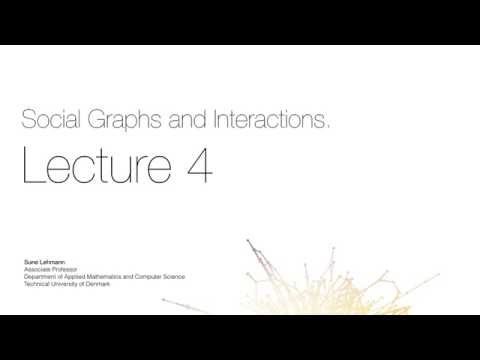

In [2]:
YouTubeVideo("91gknsVGHls",width=800, height=450)

> _Exercise_: Find the names of all the philosopher-pages, download and analyze them.
> 
> * [This wiki-page](https://en.wikipedia.org/wiki/Lists_of_philosophers) contains list of philosophers from various branches of philosophy:
>   1. [aestheticians](https://en.wikipedia.org/wiki/List_of_aestheticians)
>   2. [epistemologists](https://en.wikipedia.org/wiki/List_of_epistemologists)
>   3. [ethicists](https://en.wikipedia.org/wiki/List_of_ethicists) 
>   4. [logicians](https://en.wikipedia.org/wiki/List_of_logicians)
>   5. [metaphysicians](https://en.wikipedia.org/wiki/List_of_metaphysicians)
>   6. [social and political philosophers](https://en.wikipedia.org/wiki/List_of_social_and_political_philosophers)
> 
> We're going to have to go and extract the page names for all six groups of philosophers. Unfortunately wikipedia does not have a uniform way of setting such pages up, so you'll have to do each page differently. And I'd like you to maintain **seven** (7) separate lists of philosophers. One for each branch of philosophy - and one combined list of all philosophers. 
> 
> * Let's put together some descriptive statistics:
>   * How many philosophers in each list? How many total?
>   * Which is the largest branch of philosophy?
>   * Are some philosophers in more than one list?
>   * Which philosopher is in most lists & and how many?
>   * Let's investigate philosophers active in multiple sub-fields. Create a list of every philosopher that occurs in more than one list. Use Python to sort the list according to how many lists each philosopher belongs to (so the guy you found in the previous question is first in that list).
> 

Now that we have the names, it's time to download all of the pages. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you re-watch the **APIs video lecture** from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). I've included it below for your covenience.

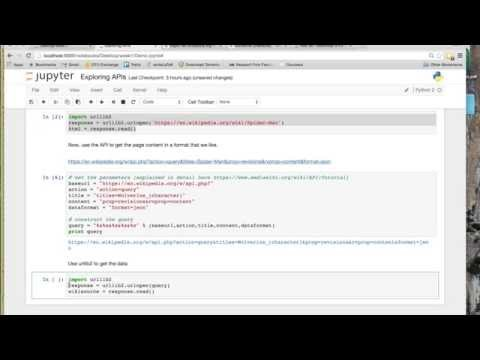

In [3]:
YouTubeVideo("9l5zOfh0CRo",width=800, height=450)

> _Exercise_: Download wikipages and save them to your own computer. For each of the philosophers in the _combined list_ obtained in the previous exercise, use Wikipedia's API to download the full page content (using python) and save it (get it in `json` format, _AND **don't** get the `html` version of the page which is much more difficult to parse_). 
>
> ### Important Point Starting
> This is an important point, so I will repeat it: **Don't get the `html` version of the page (which is much more difficult to parse**), get the standard [wiki markup](https://en.wikipedia.org/wiki/Help:Wiki_markup) which is what you see when you press "edit" on a wikipedia page.
> 
> **Important Point completed**
>
> A couple of extra tips below:
> 
> * Some pages contain unicode characters, so we recommend you save the files using the [`io.open`](http://stackoverflow.com/questions/5250744/difference-between-open-and-codecs-open-in-python) method with `utf-8` encoding
> * Some philosopher names have spaces. As a first stab, try to simply substitute spaces with underscores. (E.g. `https://en.wikipedia.org/wiki/Thomas_Aquinas` from `Thomas Aquinas`. If that doesn't work, you can construct the api-url using `urllib.quote` (or similar). This is another way of handling spaces using and other non-ascii characters in `url`s using [url encoding](http://www.w3schools.com/tags/ref_urlencode.asp).
> * Store the content of all pages. It's up to you how to do this. One strategy is to use Python's built in `pickle` format. Or you can simply write the content of wiki-pages to text files and store those in a folder on your computer. I'm sure there are other ways. It's crucial that you store them in a way that's easy to access, since we'll use these pages a lot throughout the remainder of the course (so you don't want to retrieve them from wikipedia every time).
> 

# Part B: Building the networks

Now, we're going to build a NetworkX directed graph of the links between pages. For each philosopher page, we'll find all the links to other characters, and for each link add an edge in the graph. 
> 
> _Exercise_: Build the philosopher network. The **combined list** from above provides the network nodes. We will use info from the pages to define links. Every time philosopher A's page links to philosopher B's page, we create a directed link from A to B. There are many ways to do this, but below, I've tried to break it down into natural steps.
> 
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. There are many ways to iterate over pages - feel free to choose the one that matches the way you've chosen to store the pages.
> * For each link you extract, check if the target is in the list you generated above. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.github.io/documentation/development/reference/classes.digraph.html) to store the network.
> 